In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm, rc
from cycler import cycler
import pandas as pd

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
color_schem = plt.cm.Spectral

In [2]:
def get_abvr_name(name):
    if name == 'aabh':
        return r'\bf{BHAA}'
    elif name == 'abh':
        return r'\bf{BHSA}'
    elif name == 'ah':
        return r'\bf{HA}'
    elif name == 'ahrelu':
        return r'\bf{SHA-ReLU}'
    elif name == 'srelu':
        return r'SReLU'
    elif name == 'prelu':
        return r'PReLU'
    elif name == 'lrelu':
        return r'LReLU'
    elif name == 'trelu':
        return r'TReLU'
    elif name == 'elu':
        return r'ELU'
    elif name == 'pelu':
        return r'PELU'
    elif name == 'psoftplus':
        return r'P-Softplus'
    elif name == 'sigmoid':
        return r'Log\'{i}stica'
    elif name == 'relu':
        return r'ReLU'
    elif name == 'tanh':
        return r'Tanh'
    elif name == 'softplus':
        return r'Softplus'

In [3]:
def get_name(name):
    if name == 'aabh':
        return r'Bi-hiperb\'{o}lica assim\'{e}trica adaptativa'
    elif name == 'abh':
        return r'Bi-hiperb\'{o}lica sim\'{e}trica adaptativa'
    elif name == 'ah':
        return r'Hiperb\'{o}lica adaptativa'
    elif name == 'ahrelu':
        return r'Suaviza\c{c}\~{a}o hiperb\'{o}lica da ReLU'
    elif name == 'srelu':
        return r'S-sharped ReLU'
    elif name == 'prelu':
        return r'Parametric ReLU'
    elif name == 'lrelu':
        return r'Leaky ReLU'
    elif name == 'trelu':
        return r'Thresholded ReLU'
    elif name == 'elu':
        return r'Exponential Linear Unit'
    elif name == 'pelu':
        return r'Parametric ELU'
    elif name == 'psoftplus':
        return r'Parametric softplus'
    elif name == 'sigmoid':
        return r'Log\'{i}stica'
    elif name == 'relu':
        return r'ReLU'
    elif name == 'tanh':
        return r'Tangente hiperb\'{o}lica'
    elif name == 'softplus':
        return r'Softplus'

In [4]:
def plot_loss(result, file_name): 
    fig, ax = plt.subplots()

    # Example data
    fn = result['fn']
    y_pos = np.arange(len(fn))
    loss = result['test_loss']
    
    colors = [color_schem(i) for i in np.linspace(0, 1, result.shape[0])]

    barlist = ax.barh(y_pos, loss, align='center')
    
    for i, b in enumerate(barlist):
        b.set_color(colors[i])
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels([get_abvr_name(f) for f in fn])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Cross entropy')
    ax.set_xlim([.98*np.min(loss), 1.02*np.max(loss)])
    ax.xaxis.grid(True)
    plt.show()
    
    fig.savefig("%s_loss.pdf" % file_name, dpi=300, bbox_inches='tight')

In [5]:
def plot_acc(result, file_name): 
    fig, ax = plt.subplots()

    # Example data
    fn = result['fn']
    y_pos = np.arange(len(fn))
    loss = result['test_acc']
    
    colors = [color_schem(i) for i in np.linspace(0, 1, result.shape[0])]

    barlist = ax.barh(y_pos, loss, align='center')
    
    for i, b in enumerate(barlist):
        b.set_color(colors[i])
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels([get_abvr_name(f) for f in fn])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(r'Acur\'{a}cia')
    ax.set_xlim([.98*np.min(loss), 1.02*np.max(loss)])
    ax.xaxis.grid(True)
    plt.show()
    
    fig.savefig("%s_acc.pdf" % file_name, dpi=300, bbox_inches='tight')

In [6]:
def plot_epochs(result, file_name): 
    fig, ax = plt.subplots()

    # Example data
    fn = result['fn']
    y_pos = np.arange(len(fn))
    epochs = result['epochs']
    
    colors = [color_schem(i) for i in np.linspace(0, 1, result.shape[0])]

    barlist = ax.barh(y_pos, epochs, align='center')
    
    for i, b in enumerate(barlist):
        b.set_color(colors[i])
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels([get_abvr_name(f) for f in fn])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(r'\'{E}pocas')
    ax.set_xlim([.98*np.min(epochs), 1.02*np.max(epochs)])
    ax.xaxis.grid(True)
    plt.show()
    
    fig.savefig("%s_epochs.pdf" % file_name, dpi=300, bbox_inches='tight')

In [7]:
def format_percent_and_times_100(a):
    return '%.2f' % (a * 100) + '%'

def format_percent(a):
    return '%.2f' % a + '%'

# Camada oculta com 800 neurônios

1x800


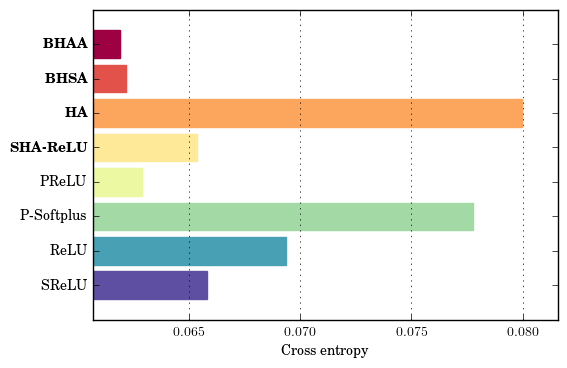

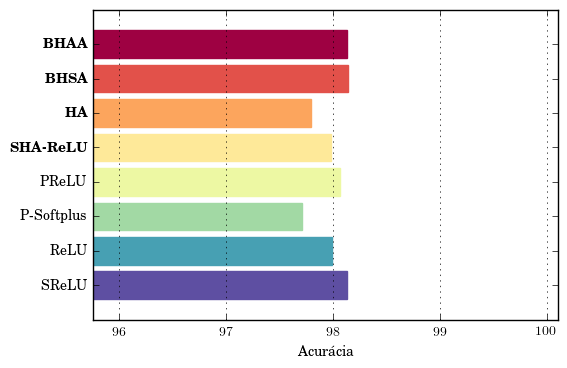

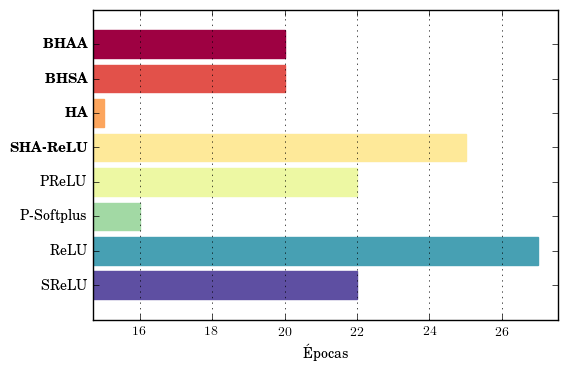

2x800


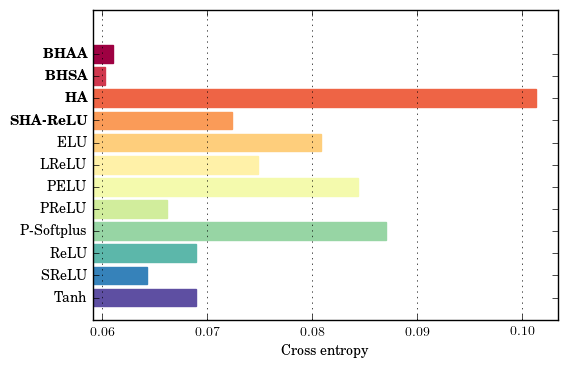

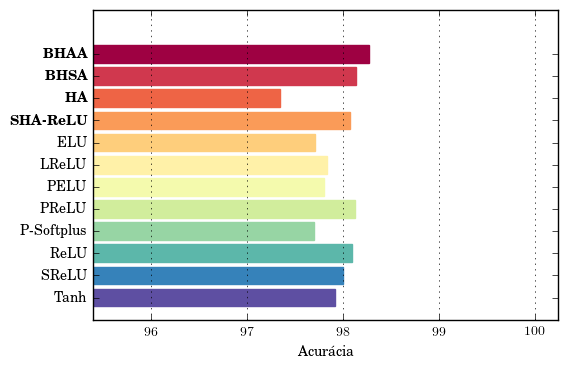

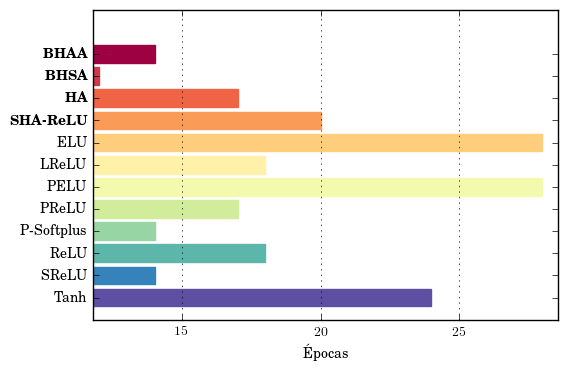

3x800


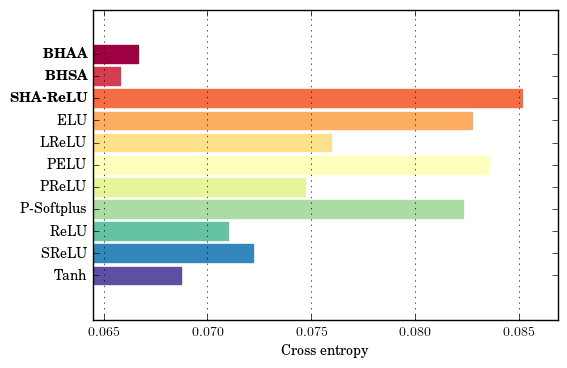

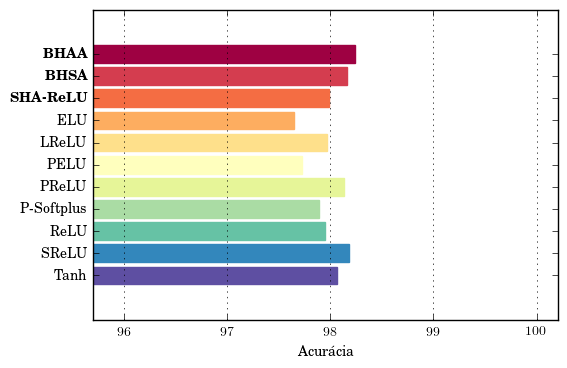

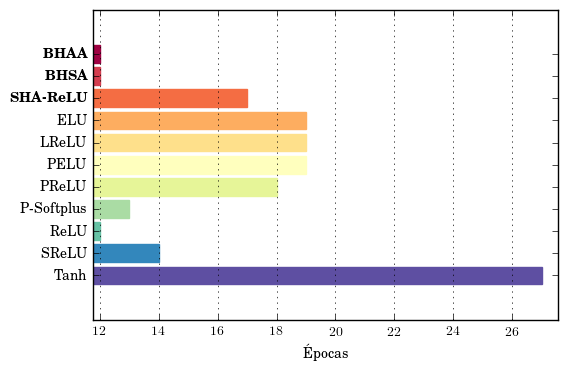

4x800


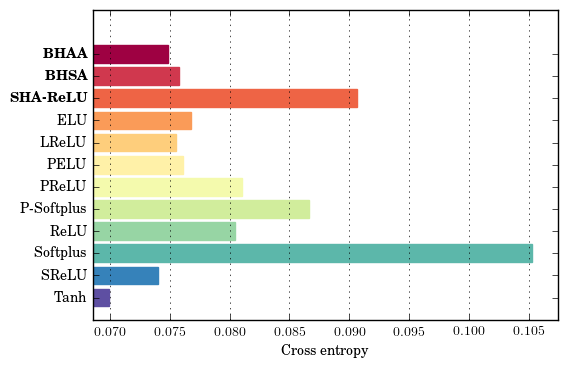

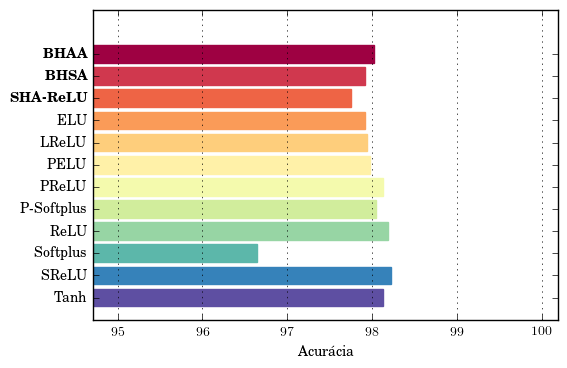

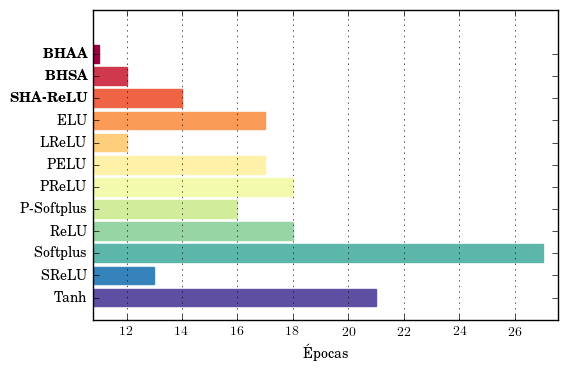

5x800


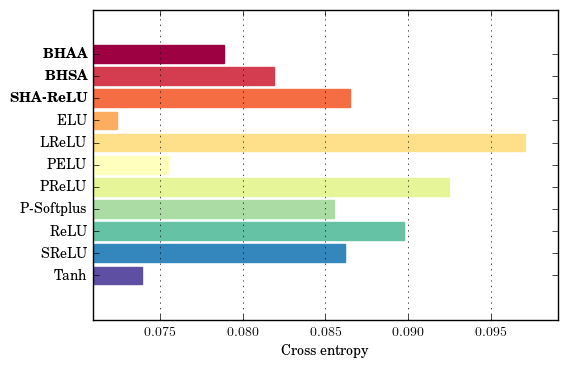

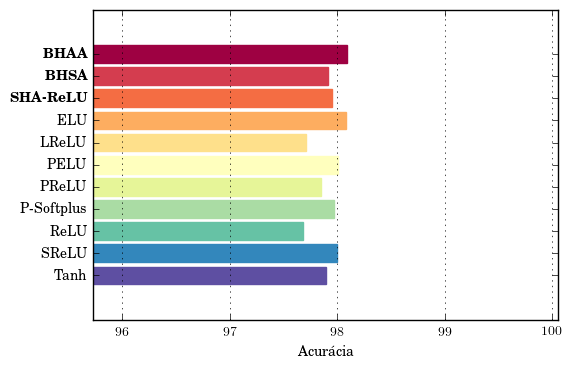

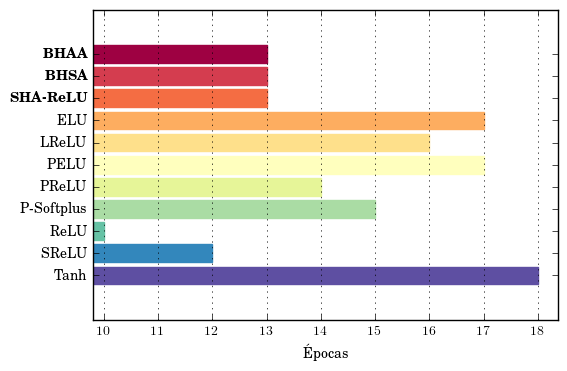

6x800


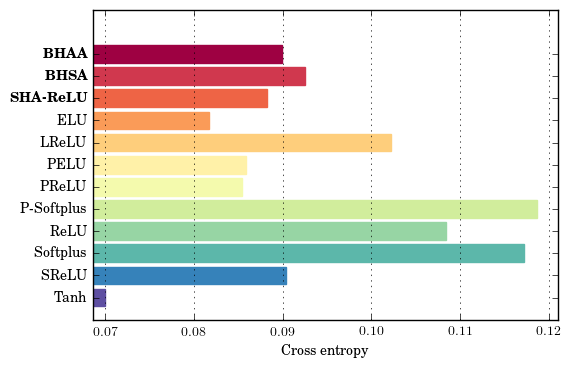

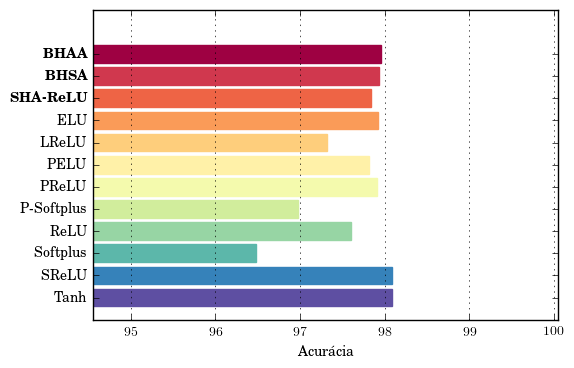

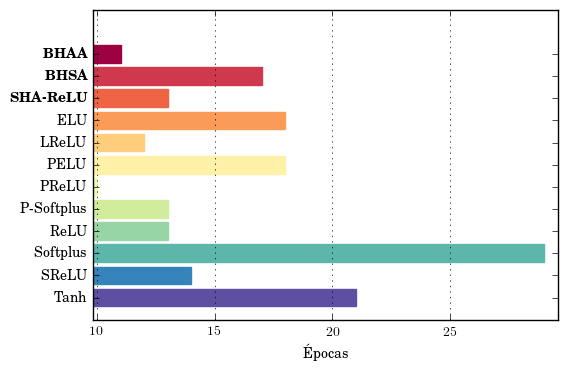

In [8]:
loss_dict = {}
acc_dict = {}
epochs_dict = {}

for file_name in ['1x800', '2x800', '3x800', '4x800', '5x800', '6x800']:
    result = pd.read_csv("../../../../code/keras/output/mnist_adaptative_%s/compare.csv" % file_name)
    
    for i, row in result.iterrows():
        if not str(row['fn']) in loss_dict:
            loss_dict[str(row['fn'])] = [get_abvr_name(str(row['fn']))]
        loss_dict[str(row['fn'])].append(float(row['test_loss']))
        
        if not str(row['fn']) in acc_dict:
            acc_dict[str(row['fn'])] = [get_abvr_name(str(row['fn']))]
        acc_dict[str(row['fn'])].append(float(row['test_acc']))
        
        if not str(row['fn']) in epochs_dict:
            epochs_dict[str(row['fn'])] = [get_abvr_name(str(row['fn']))]
        epochs_dict[str(row['fn'])].append(int(row['epochs']))
        
    result = result[result['test_loss'] < 1.0]
    result = result[result['epochs'] < 30]
    result = result.sort_values(by='fn')
    
    print(file_name)
    plot_loss(result, file_name)
    plot_acc(result, file_name)
    plot_epochs(result, file_name)
        

loss_df = pd.DataFrame([v for v in loss_dict.values()], columns=['fn', 1, 2, 3, 4, 5, 6]).sort_values(by=['fn'])
acc_df = pd.DataFrame([v for v in acc_dict.values()], columns=['fn', 1, 2, 3, 4, 5, 6]).sort_values(by=['fn'])
epochs_df = pd.DataFrame([v for v in epochs_dict.values()], columns=['fn', 1, 2, 3, 4, 5, 6]).sort_values(by=['fn'])

with open('losse.tex', 'w') as fp:
        fp.write(loss_df.to_latex(
                columns=['fn', 1, 2, 3, 4, 5, 6],
                index=False,
                longtable=True)
             )
        
with open('acc.tex', 'w') as fp:
        fp.write(acc_df.to_latex(
                columns=['fn', 1, 2, 3, 4, 5, 6],
                formatters={
                    1: format_percent,
                    2: format_percent,
                    3: format_percent,
                    4: format_percent,
                    5: format_percent,
                    6: format_percent
                },
                index=False,
                longtable=True)
             )
        
with open('epochs.tex', 'w') as fp:
        fp.write(epochs_df.to_latex(
                columns=['fn', 1, 2, 3, 4, 5, 6],
                index=False,
                longtable=True)
             )


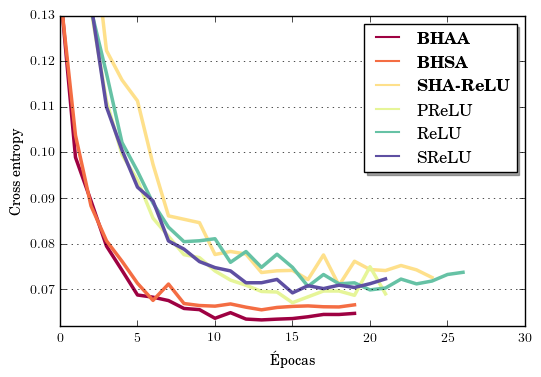

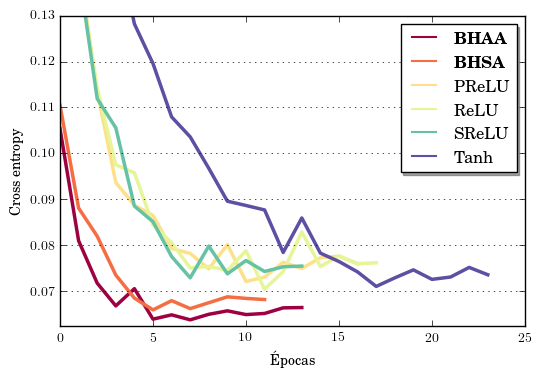

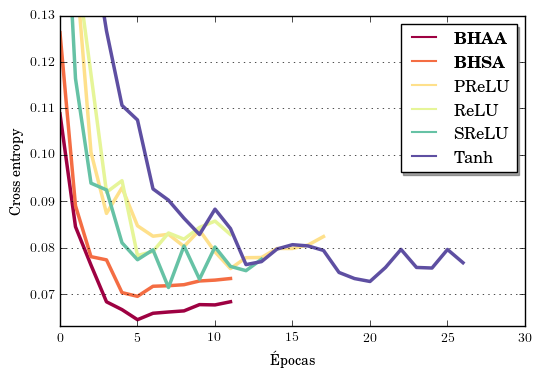

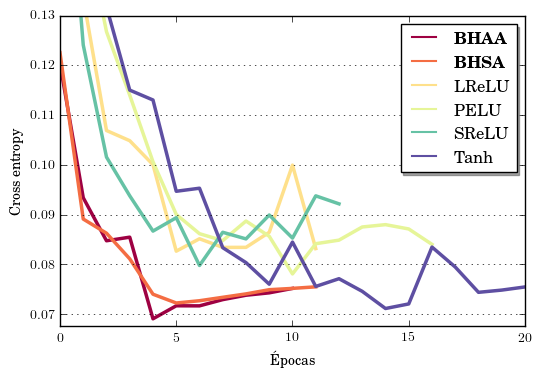

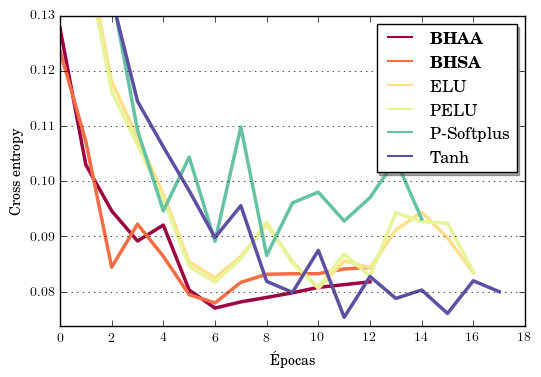

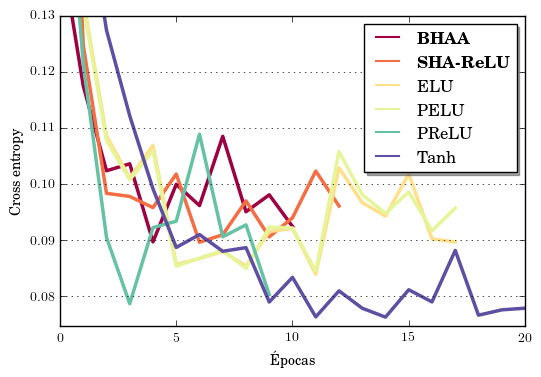

In [9]:
for file_name in ['1x800', '2x800', '3x800', '4x800', '5x800', '6x800']:
    result = pd.read_csv("../../../../code/keras/output/mnist_adaptative_%s/compare.csv" % file_name)
    result = result[result['test_loss'] < 1.0]
    result = result[result['epochs'] < 30]
    result = result.sort_values(by='test_loss')
    result = result[0:6]
    result = result.sort_values(by='fn')
    
    fig, ax = plt.subplots()
    ax.set_prop_cycle(cycler('color', [color_schem(i) for i in np.linspace(0, 1, result.shape[0])]))
    
    histories = []
    mins = []
    maxs = []
    for fn in result.fn:      
        h = pd.read_csv("../../../../code/keras/output/mnist_adaptative_%s/%s.csv" % (file_name, fn))
        histories.append(h)
        
        ax.plot(h['val_loss'], label=get_abvr_name(fn), linewidth=2.5)
        
        m = np.min(h['val_loss'])
        M = np.max(h['val_loss'][10:-1])
        mins.append(m)
        maxs.append(M)
        
    legend = ax.legend(loc='upper right', shadow=True)
    ax.set_ylim([0.98*min(mins), 0.13])
    ax.yaxis.grid(True)
    ax.set_xlabel(r'\'{E}pocas')
    ax.set_ylabel(r'Cross entropy')

    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width

    plt.show()
    fig.savefig("%s_convergence.pdf" % file_name, dpi=300, bbox_inches='tight')

# variação dos parâmetros

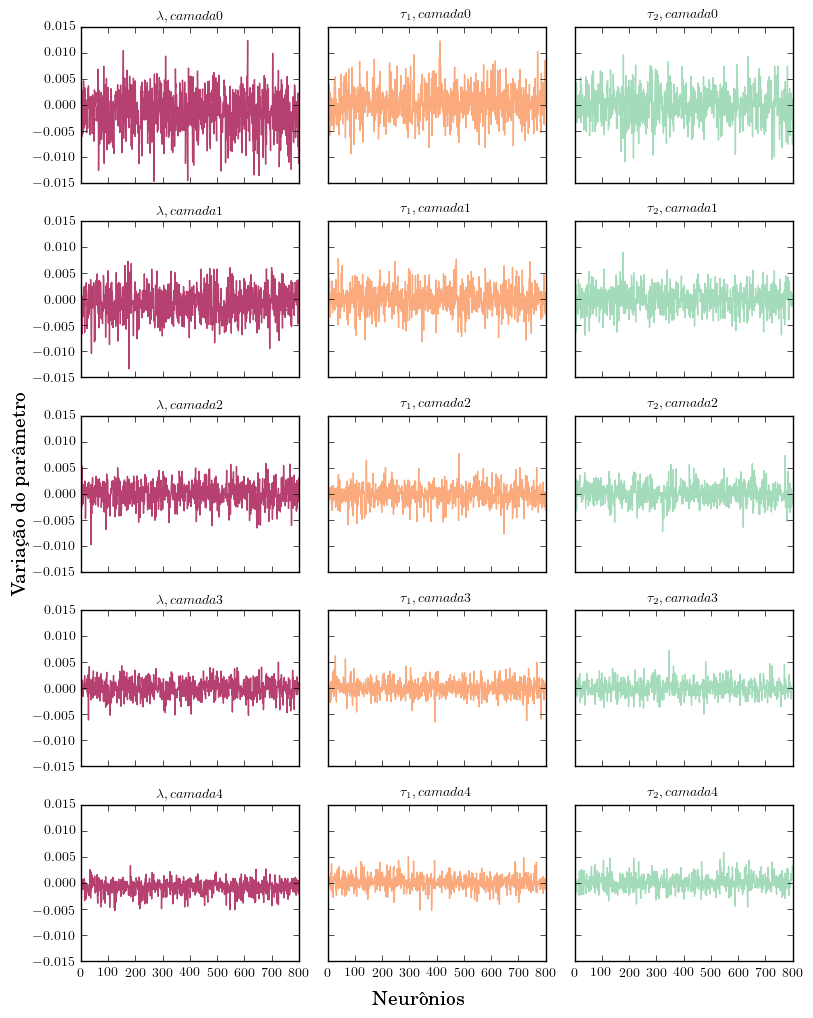

In [10]:
f, axarr = plt.subplots(5, 3, figsize=(8, 10), sharex=True, sharey=True)
colors = [color_schem(i) for i in [0, 0.25, 0.75]]

for i in range(5):
    for j, p in enumerate(['lambda', 'tau1', 'tau2']):
        start = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/%s_%d_start.csv" % (p,i))
        stop = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/%s_%d_stop.csv" % (p,i))
        ax = axarr[i,j]
        ax.plot(start-stop, alpha=0.75, label='inicial', color=colors[j])
        if p == 'lambda':
            ax.set_title(r'$\lambda, camada %d$' % i, fontsize=10)
        elif p == 'tau1':
            ax.set_title(r'$\tau_1, camada %d$' % i, fontsize=10)
        elif p == 'tau2':
            ax.set_title(r'$\tau_2, camada %d$' % i, fontsize=10)
    
            

plt.tight_layout()
f.text(0.5, -0.01, r'Neur\^{o}nios', ha='center', fontsize=14)
f.text(-0.01, 0.5, r'Varia\c{c}\~{a}o do par\^{a}metro', va='center', rotation='vertical', fontsize=14)
plt.show()
f.savefig("evolution.pdf", dpi=300, bbox_inches='tight')

In [11]:
def ativacao_bihiperbolica_escalada(x, lmbda, tau1, tau2):
    return np.sqrt(lmbda**2 * (x + 1 / (2*lmbda))**2 + tau1**2) - np.sqrt(lmbda**2 * (x - 1 / (2*lmbda))**2 + tau2**2)

/home/canalli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


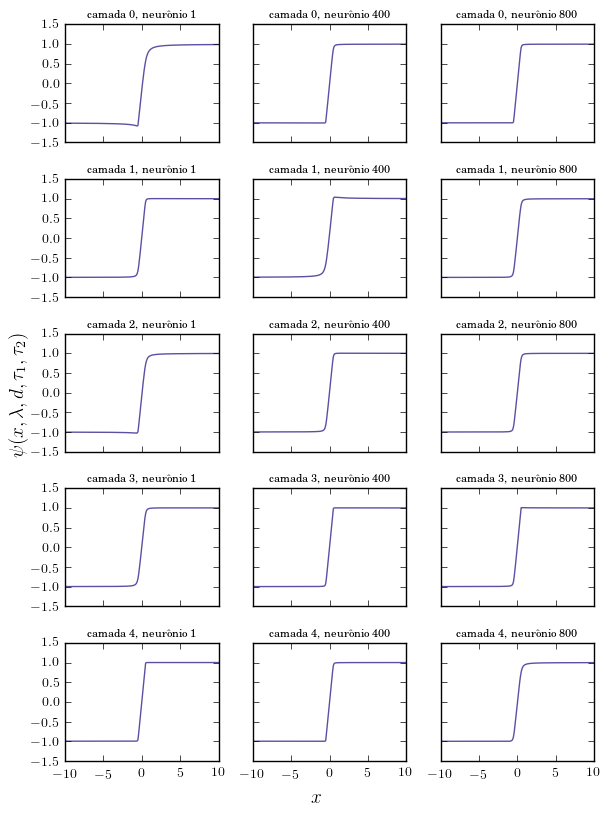

In [12]:
n = 3
x = np.arange(-10, 10.1, 0.1)
f, axarr = plt.subplots(5, n, figsize=(6, 8), sharex=True, sharey=True)
colors = [color_schem(i) for i in np.linspace(0,1,2)]

for i in range(5):
    for j, p in enumerate( np.floor(np.linspace(0,799,n)) ):
        lambda_start = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/lambda_%d_start.csv" % i)
        lambda_stop = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/lambda_%d_stop.csv" % i)
        tau1_start = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/tau1_%d_start.csv" % i)
        tau1_stop = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/tau1_%d_stop.csv" % i)
        tau2_start = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/tau2_%d_start.csv" % i)
        tau2_stop = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_4x800/tau2_%d_stop.csv" % i)
        ax = axarr[i,j]
                          
        #ax.plot(x, ativacao_bihiperbolica_escalada(x, lambda_start[p], tau1_start[p], tau2_start[p]), color=colors[0])
        ax.plot(x, ativacao_bihiperbolica_escalada(x, lambda_stop[p], tau1_stop[p], tau2_stop[p]), color=colors[1])
        ax.set_title(r'camada %d, neur\^{o}nio %d' % (i,p+1), fontsize=8)            

plt.tight_layout()
f.text(0.5, -0.01, r'$x$', ha='center', fontsize=14)
f.text(-0.01, 0.5, r'$\psi(x, \lambda, d, \tau_1, \tau_2)$', va='center', rotation='vertical', fontsize=14)
plt.show()
f.savefig("funcoes.pdf", dpi=300, bbox_inches='tight')

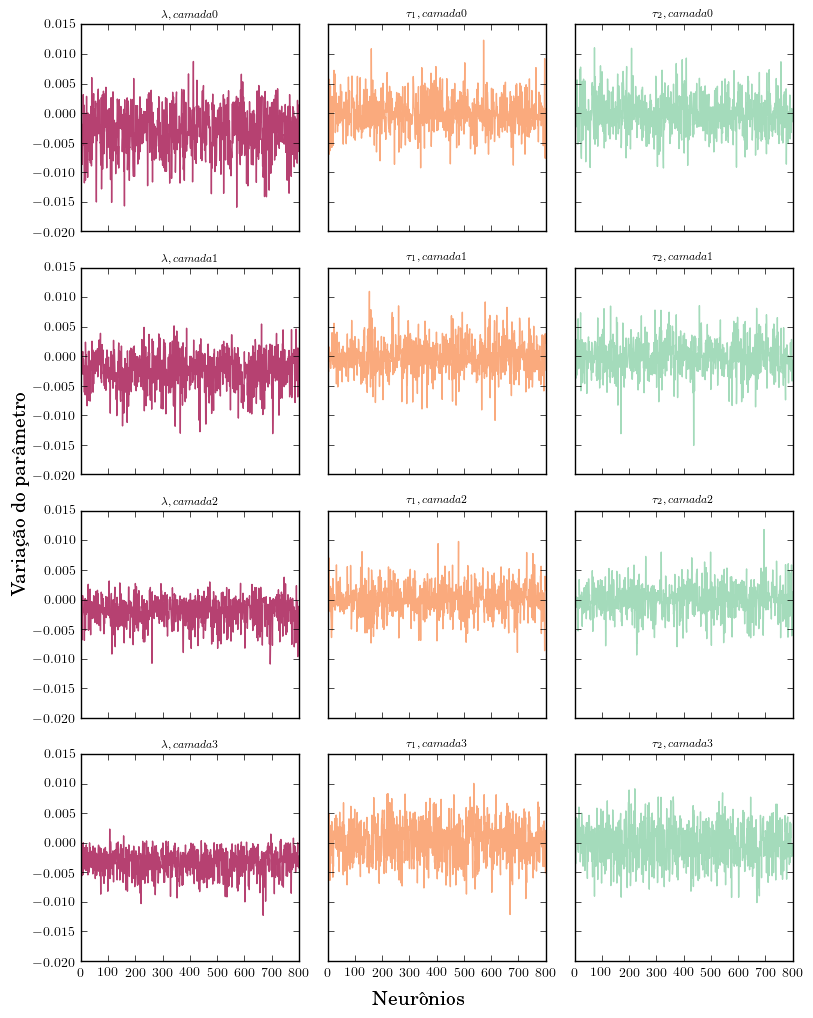

In [13]:
f, axarr = plt.subplots(4, 3, figsize=(8, 10), sharex=True, sharey=True)
colors = [color_schem(i) for i in [0, 0.25, 0.75]]

for i in range(4):
    for j, p in enumerate(['lambda', 'tau1', 'tau2']):
        start = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_3x800/%s_%d_start.csv" % (p,i))
        stop = np.genfromtxt("../../../../code/keras/output/mnist_v_adaptative_3x800/%s_%d_stop.csv" % (p,i))
        ax = axarr[i,j]
        ax.plot(start-stop, alpha=0.75, label='inicial', color=colors[j])
        if p == 'lambda':
            ax.set_title(r'$\lambda, camada %d$' % i, fontsize=8)
        elif p == 'tau1':
            ax.set_title(r'$\tau_1, camada %d$' % i, fontsize=8)
        elif p == 'tau2':
            ax.set_title(r'$\tau_2, camada %d$' % i, fontsize=8)
    
            

plt.tight_layout()
f.text(0.5, -0.01, r'Neur\^{o}nios', ha='center', fontsize=14)
f.text(-0.01, 0.5, r'Varia\c{c}\~{a}o do par\^{a}metro', va='center', rotation='vertical', fontsize=14)
plt.show()
fig.savefig("evolution_100.pdf", dpi=300, bbox_inches='tight')